# 插值模块

scipy.interpolate是SciPy中负责插值操作的子模块：

In [1]:
from scipy import interpolate

In [2]:
import numpy as np

插值（Interpolation）是通过已知的离散数据点求未知数据的过程或方法。例如，考虑这样一组离散数据点：

In [3]:
x = np.linspace(0, 2*np.pi, 10)

In [4]:
y = np.sin(x)

In [5]:
from matplotlib import pyplot as plt 

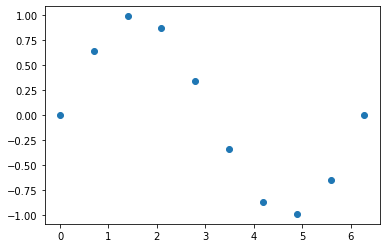

In [6]:
plt.plot(x, y, "o")

这些数据点x的维度为1，因此是个一维插值问题。一维插值问题对应的函数为`interpolate.interp1d()`：

In [7]:
f = interpolate.interp1d(x, y)

返回值f可以像函数一样被调用。当输入值为数字时，f返回一个NumPy数组：

In [8]:
f(0)

array(0.)

In [9]:
f([np.pi / 6, np.pi / 2])

array([0.48209071, 0.95511217])

默认情况下，插值函数允许的定义域范围由输入数据的范围决定。对于超出范围的数据，调用f会抛出异常。在上面的例子中，x的范围为0到2倍圆周率，因此输入负数会报错。

可以通过在调用插值函数时，加入bounds_error参数来允许超出范围的输入：

In [10]:
f = interpolate.interp1d(x, y, bounds_error=False)

In [11]:
f(-np.pi)

array(nan)

还可以加入fill_value参数指定超出范围的默认返回值：

In [12]:
f = interpolate.interp1d(x, y, bounds_error=False, fill_value=-100)

In [13]:
f(-np.pi)

array(-100.)

线性插值对应的函数如图8-2所示：

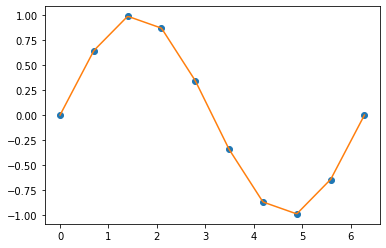

In [14]:
t = np.linspace(0, 2 * np.pi, 200)

f = interpolate.interp1d(x, y)
plt.plot(x, y, 'o', t, f(t))
plt.show()

可以通过加入`kind`参数，实现不同的插值方法。

- 'nearest'：最近邻插值，x对应的值为离x最近的点对应的值。
- 'zero'：零阶插值，使用一个常数分段函数进行插值。
- 'linear'：线性插值，默认插值方法。
- 'quadratic'：二次函数插值。
- 'cubic'：三次函数插值。
- 数字4，5，6，7：更高次数的函数插值。

例如最近邻：

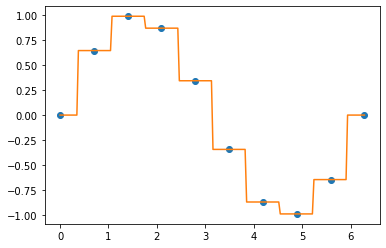

In [15]:
t = np.linspace(0, 2 * np.pi, 200)

f = interpolate.interp1d(x, y, kind="nearest")
plt.plot(x, y, 'o', t, f(t))
plt.show()

三次插值：

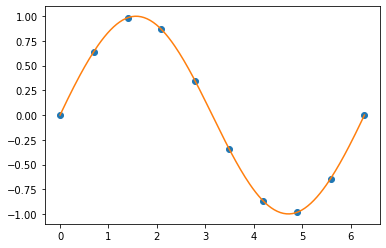

In [16]:
t = np.linspace(0, 2 * np.pi, 200)

f = interpolate.interp1d(x, y, kind="cubic")
plt.plot(x, y, 'o', t, f(t))
plt.show()